# Storage-X figures

Description

In [1]:
import warnings
warnings.filterwarnings("ignore")
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Standardize figure layout:

In [2]:
tech_colors_path = 'scripts/tech_colors.yaml'

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

with open(tech_colors_path) as file:
    tech_colors = yaml.safe_load(file)['tech_colors']
tech_colors['CO2 capture'] = tech_colors['DAC']
tech_colors['domestic demand'] = '#050000'
tech_colors['industry demand'] = '#423737'
tech_colors['BEV'] = '#dffc03'
tech_colors['EV battery'] = '#dffc03'
tech_colors['heat pump'] = '#b52f2f'
tech_colors['resistive heater'] = '#c45c5c'
tech_colors['V2G'] = '#38f2d9'
tech_colors['transmission lines'] = '#6c9459'
tech_colors['storage-X'] = '#610555'
tech_colors['storage X'] = '#610555'
tech_colors['X'] = '#610555'
tech_colors['pumped hydro'] = '#53c7ba'
tech_colors['PHS'] = '#53c7ba'
tech_colors['biomass CHP CC'] = '#211408' # "#6e441c"
tech_colors['gas CHP CC'] = '#211508' # "#6e441c"

## Temporal balance

In [3]:
networks_opt = {'path':'networks/high_efficiency/',
                'wyear': '2003', 
                'eta1':'1.0', 
                'eta2':'1.9',
                'c1':'1.0', 
                'c2':'1.0', 
                'chat':'0.15'} # Check which network configurations are available in your path

Description
Moving average equal to, e.g, 24 takes the first 24 values (with 3-hourly resoulution, this is equivalent to a 3-daily moving average)

In [4]:
from scripts.Balancing_temporal_figures import storage_map

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


dropping non-buses Index(['EU coal', 'EU uranium'], dtype='object')


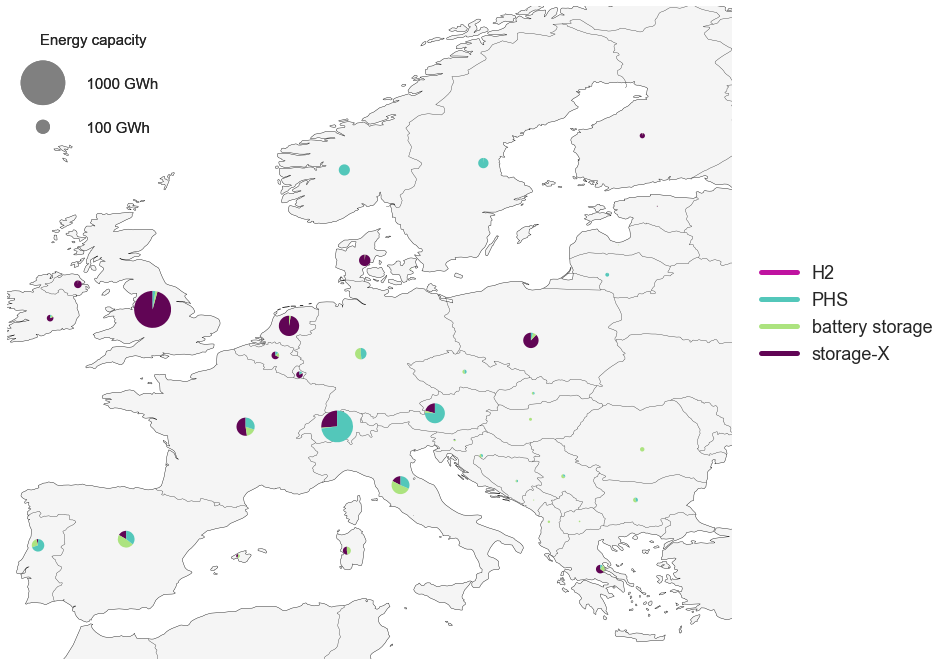

In [5]:
storage_map(networks_opt, scen='', tech_colors=tech_colors)

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


dropping non-buses Index(['EU coal', 'EU oil', 'EU solid', 'EU uranium'], dtype='object')


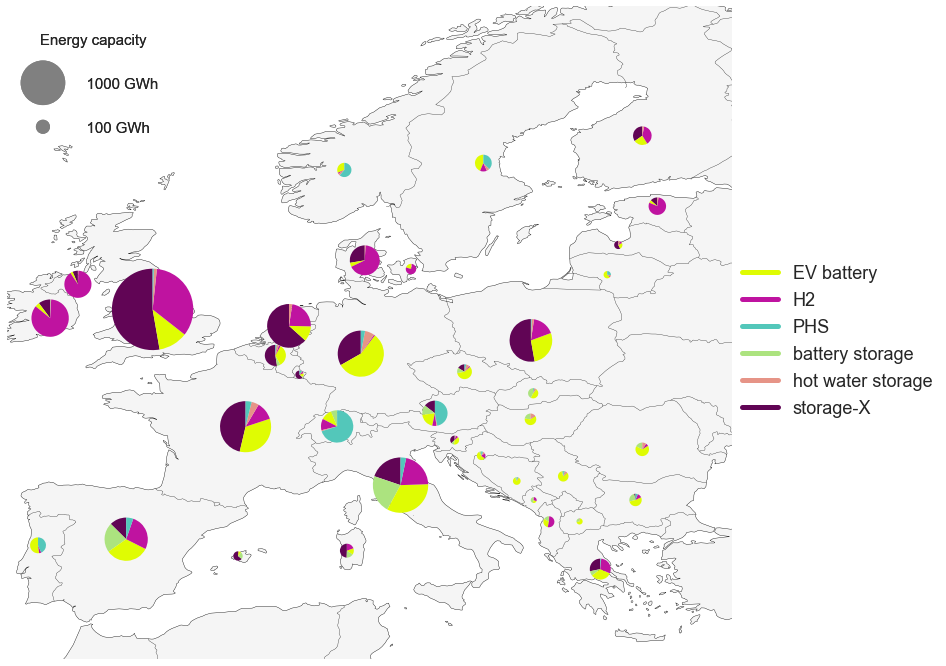

In [6]:
storage_map(networks_opt, scen='-T-H-I-B', tech_colors=tech_colors)

In [7]:
from scripts.Balancing_temporal_figures import temporal

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


dropping Index(['H2 charging', 'coal', 'helmeth', 'nuclear', 'transmission lines',
       'industry demand'],
      dtype='object')
No transmission lines
dropping Index(['H2 charging', 'coal', 'helmeth', 'nuclear', 'transmission lines',
       'industry demand'],
      dtype='object')
No transmission lines


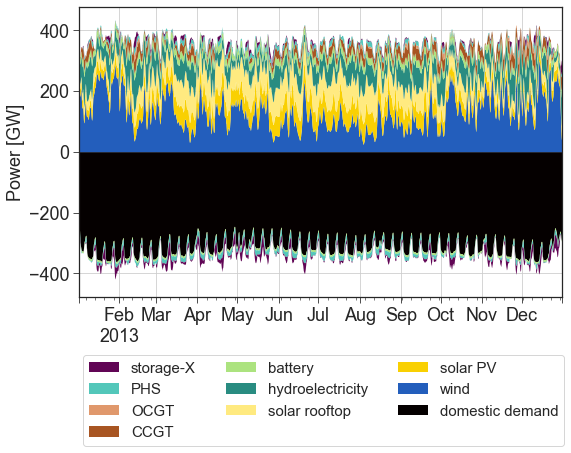

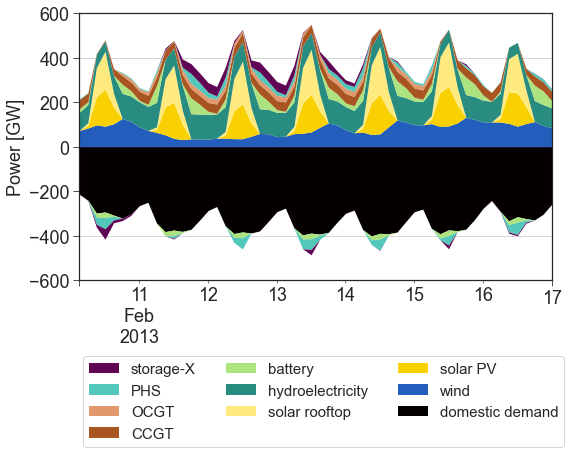

In [8]:
temporal(networks_opt, scen='', moving_average=8, tech_colors=tech_colors); 
# moving average = 8 corresponds to 24-hourly moving average since the resolution in the optimization is 3-hourly

INFO:pypsa.io:Imported network elec_s_y2003_n37_lv1.0__Co2L0.05-3H-T-H-I-B-solar+p3-dist1-X Charge+e1.0-X Charge+c1.0-X Discharge+e1.9-X Discharge+c1.0-X Store+c0.15.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines
dropping Index(['CCGT', 'CHP CC', 'CO2 capture', 'coal', 'helmeth', 'nuclear',
       'transmission lines'],
      dtype='object')
No transmission lines


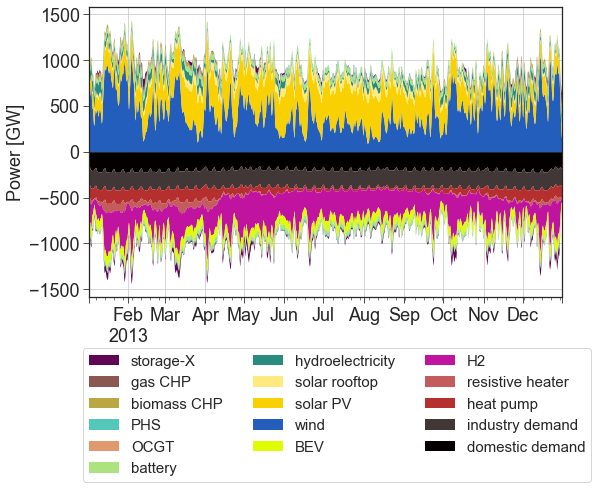

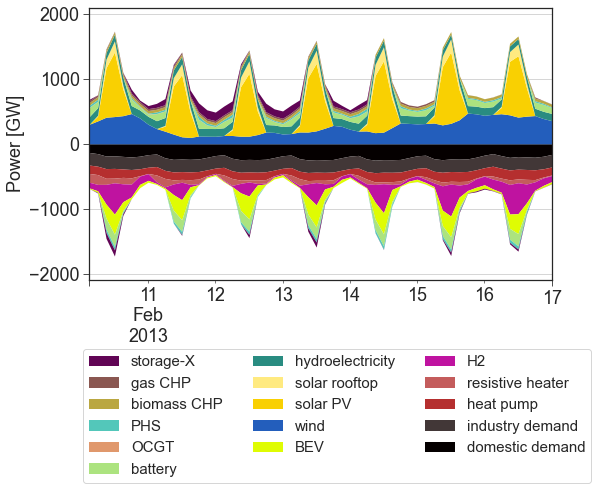

In [9]:
temporal(networks_opt, scen='-T-H-I-B', moving_average=8, tech_colors=tech_colors);

## Single-parametric sweep

Description 

Choose between metrics such as 'E', 'lc', 'G_discharge', 'duration', and 'system_cost'

In [10]:
from scripts.Single_parameter_sweep_w_weather import single_parametric_sweep

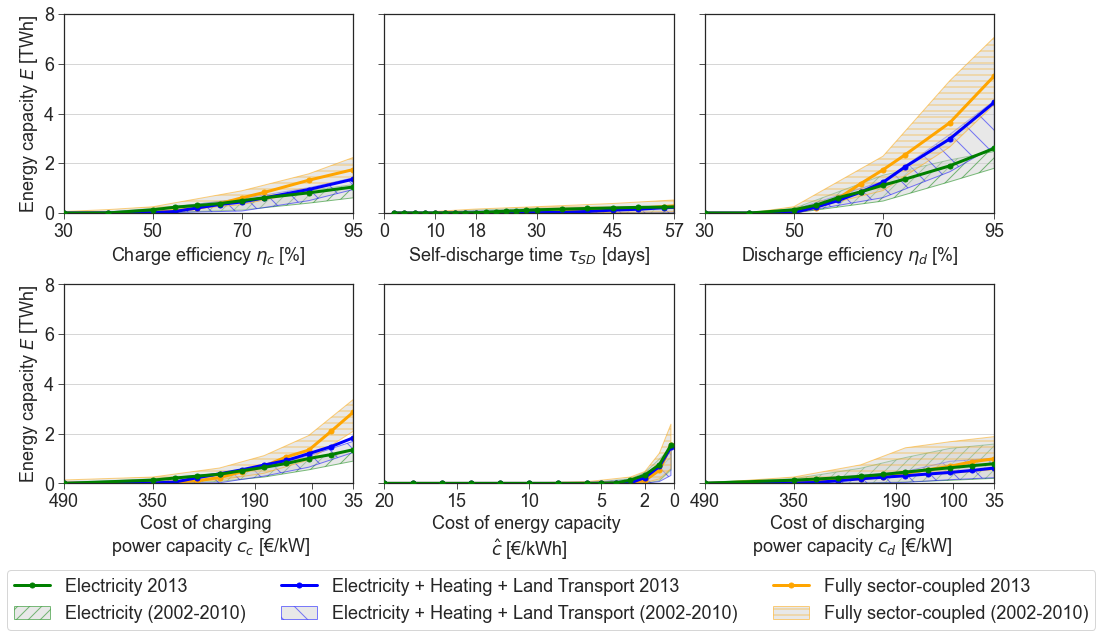

In [11]:
single_parametric_sweep(variable='E')

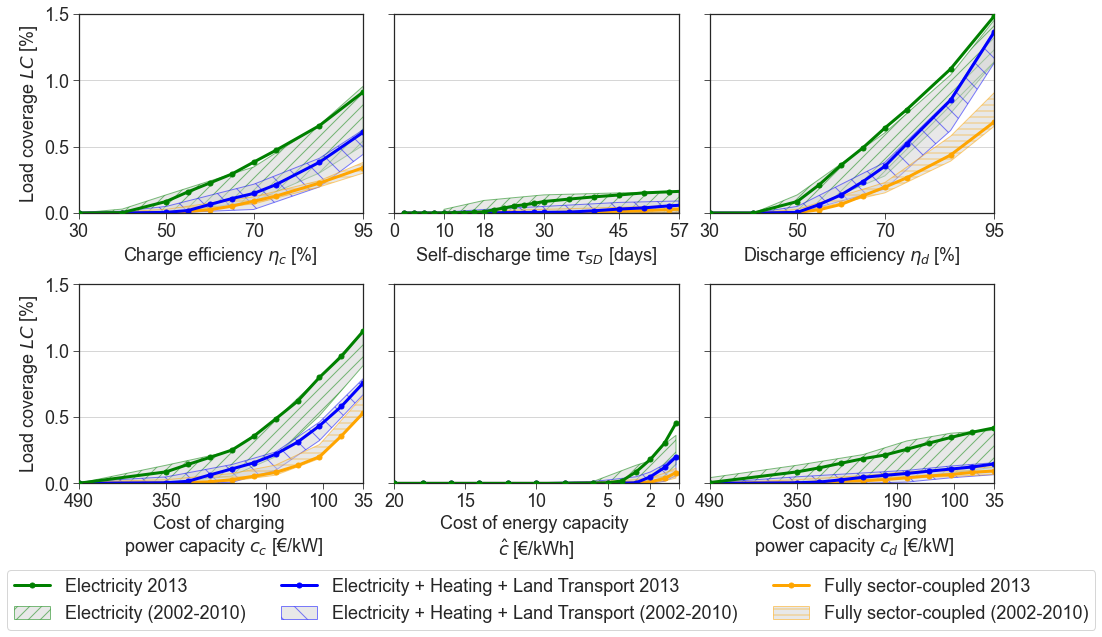

In [12]:
single_parametric_sweep(variable='lc')

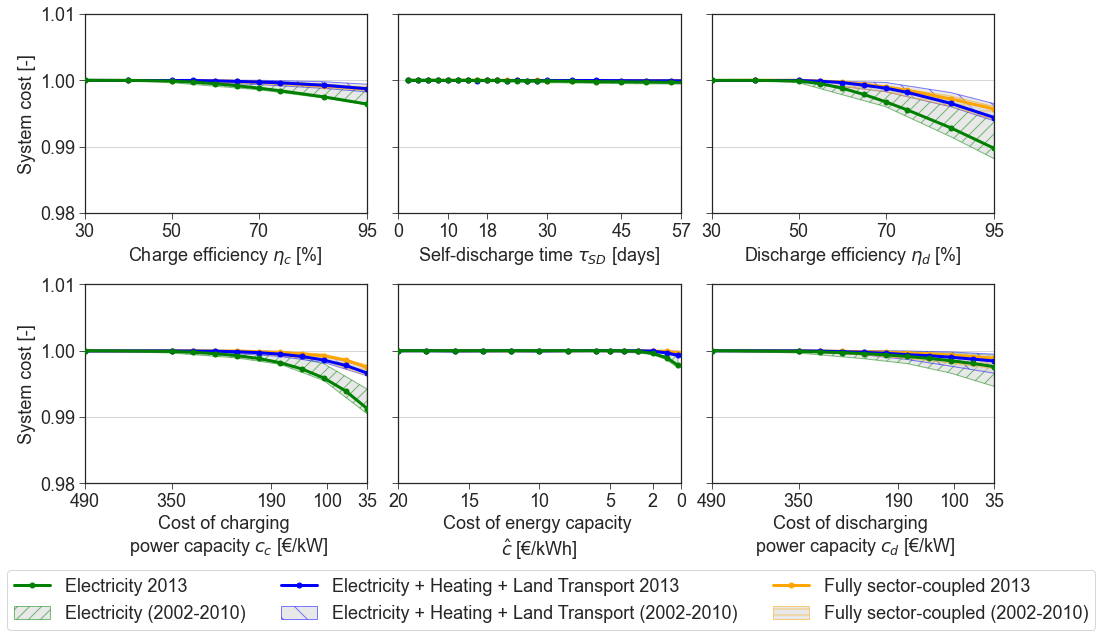

In [13]:
single_parametric_sweep(variable='system_cost')

## Spiderweb

Description 

Define lower threshold of energy capacity "threshold_E" for the storage configuration to be included. Emerging candidates can be included. Choose between:

- aCAES
- LAES
- TES
- PTES
- MSES
- RFB
- H2

Furthermore, choose between system compositions (input variable *scen*):
- '0' (SC1)
- 'T-H' (SC2)
- 'T-H-I-B' (SC3)


In [14]:
from scripts.Spiderweb import plot_spiderweb

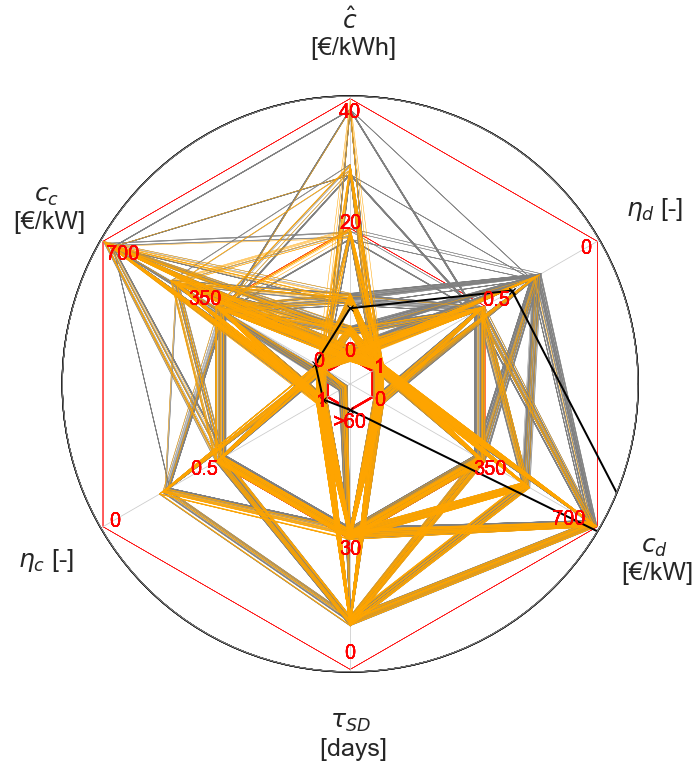

In [15]:
plot_spiderweb(scen = 'T-H-I-B', threshold_E = 2000, plot_ex = True, candidate = 'TES')

## Multivariable regression

Calculate the normalized coefficients by fitting a generalized linear regression model to the considering output metric. Here, demonstrated with the energy capacity "E".

- For load coverage, change the fitting variable to "LC"
- For system cost reduction, change this to "SCR"). 

In [16]:
from scripts.multivariable_regression import multivariable_regression

Sector:  T-H-I-B
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     98.58
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.02e-87
Time:                        17:36:54   Log-Likelihood:                -6644.8
No. Observations:                 650   AIC:                         1.330e+04
Df Residuals:                     643   BIC:                         1.333e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.603e+04   1307.523   

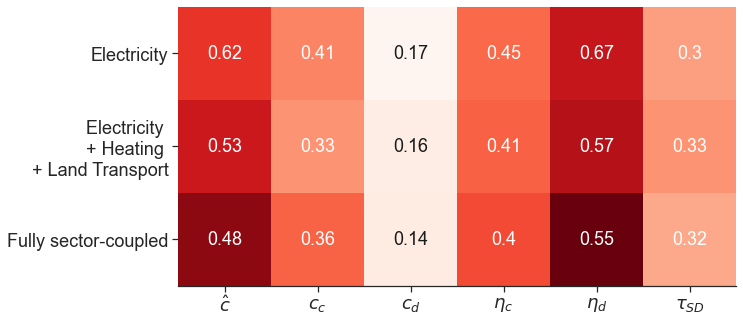

In [18]:
multivariable_regression(fitting='E', 
                         included_parameters = ['c_hat','c1','c2','eta1','eta2','tau_SD'],
                         threshold_E = 1, # to omit zero storage from the analysis
                         print_pvals=False, 
                         colors=True, 
                         scaling = False, # Whether descriptors and response are standardized 
                                          #(if not, the coefficients are standardized)
                         keep_high_eta1s=False);

## Storage requirements matrix

In [19]:
#from scripts.matrix_design_space import plot_matrix

In [20]:
#plot_matrix(quantiles = [0.25,0.50,0.75,1.00], 
 #           sector = 'T-H-I-B', 
  #          threshold_E = 2000, 
   #         omit_charge_efficiency = True, 
    #        lock_tau = False, 
     #       shading = 'nearest')

In [21]:
from scripts.three_panel_figure_designspace import plot_2D_panels

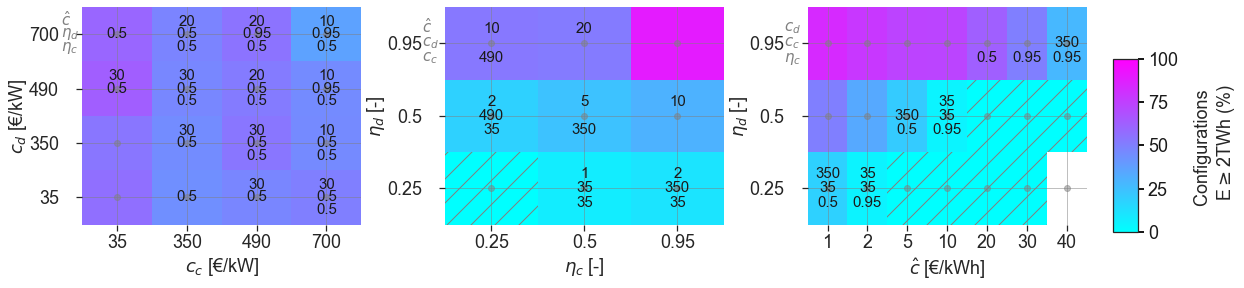

In [22]:
plot_2D_panels(sector='T-H-I-B', 
               slack=100, 
               threshold=2000, 
               normfactor=100, 
               color_variable='count_norm', 
               combination=False, 
               write_extra_indices=True, 
               omit_charge_efficiency = True, 
               lock_tau = False)

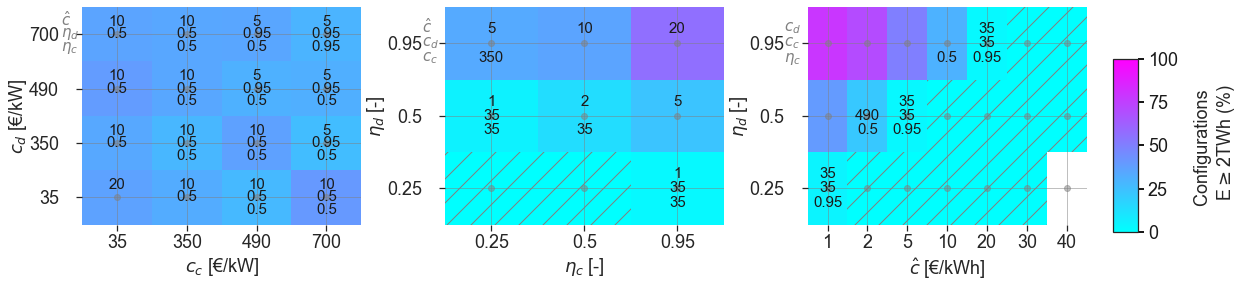

In [23]:
plot_2D_panels(sector='0', 
               slack=100, 
               threshold=2000, 
               normfactor=100, 
               color_variable='count_norm', 
               combination=False, 
               write_extra_indices=True, 
               omit_charge_efficiency = True, 
               lock_tau = False)

## Existing techs

Description

In [24]:
from scripts.read_ex_tech_nc_files import plot_existingtechs_result

.csv file for N= 37  already exists
.csv file for N= 74  already exists


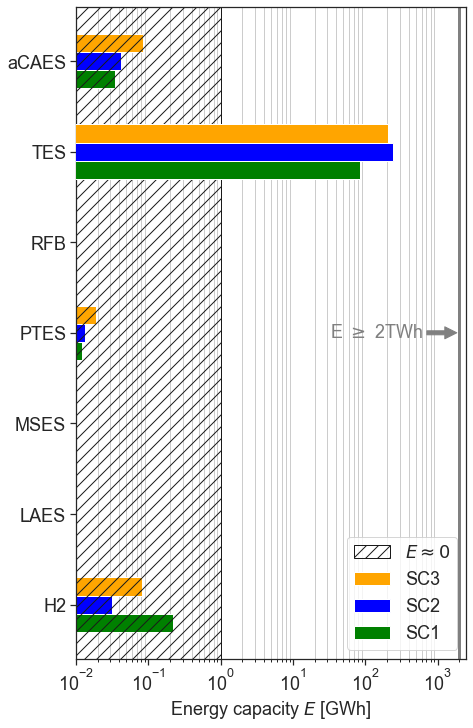

In [25]:
fig = plot_existingtechs_result(N_select='74', Ns=['37','74'])

.csv file for N= 37  already exists
.csv file for N= 74  already exists


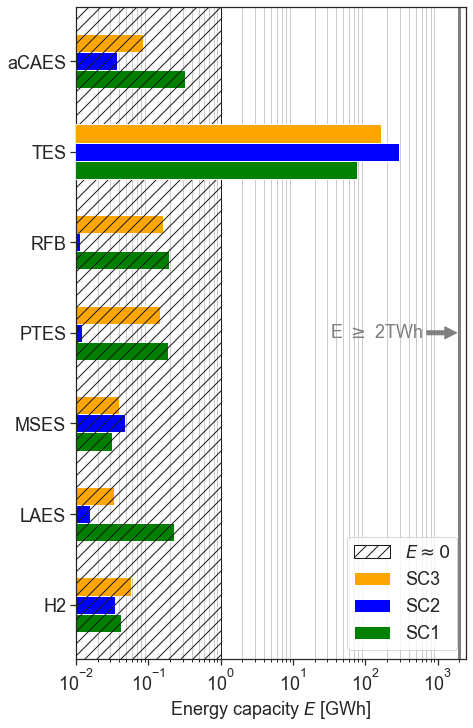

In [26]:
fig = plot_existingtechs_result(N_select='37', Ns=['37','74'])

## Plot generation mix

In [27]:
from scripts.Generation_mix import plot_generation_mix

Sector: T-H-I-B
Wind: 56.3 pm 1.9
Solar: 34.2 pm 2.3
Hydro: 6.4 pm 0.1


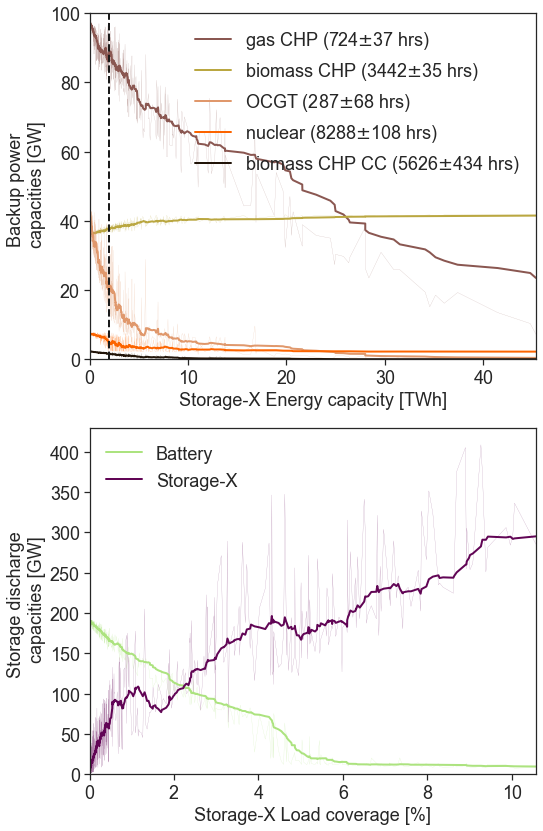

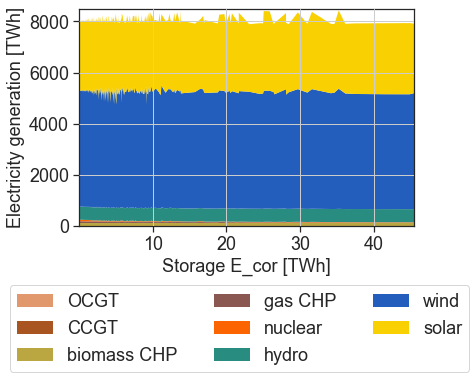

In [28]:
plot_generation_mix(tech_colors,sector='T-H-I-B')

## System cost reduction and renewable curtailment

In [29]:
from scripts.Scatterplot import plot_scatter

curtailment
c_sys [bEUR]


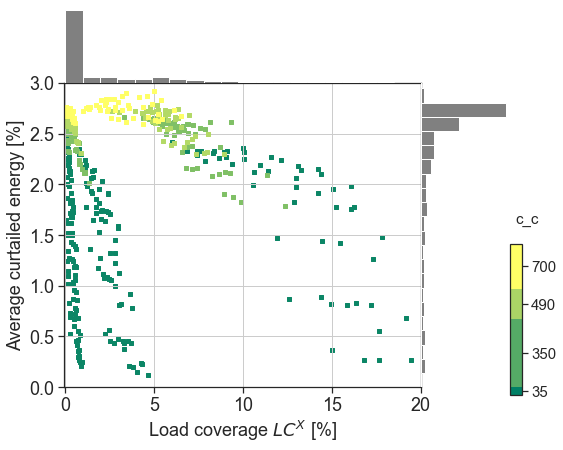

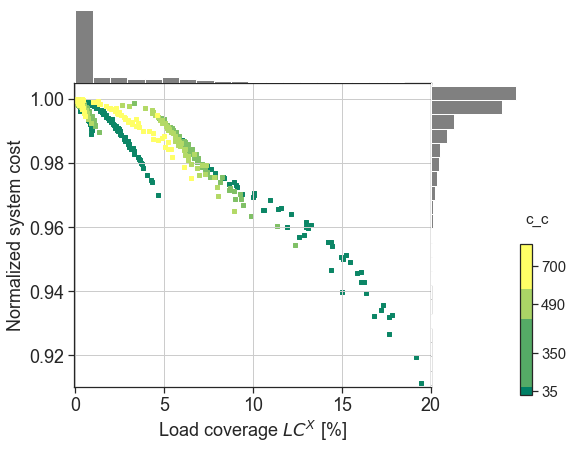

In [30]:
plot_scatter(sector='T-H-I-B',x='LC',color_acc_to='c_c', binwidth_factor = 0.05)

curtailment
c_sys [bEUR]


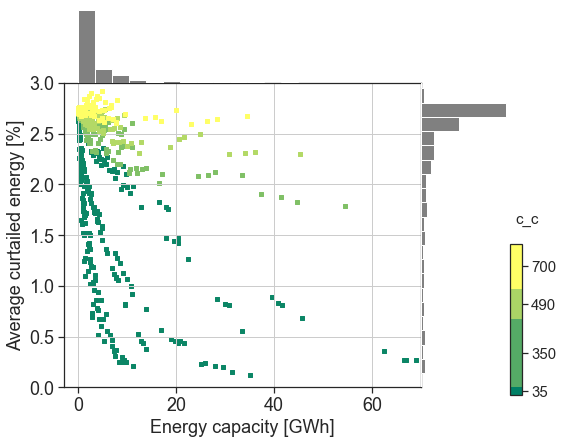

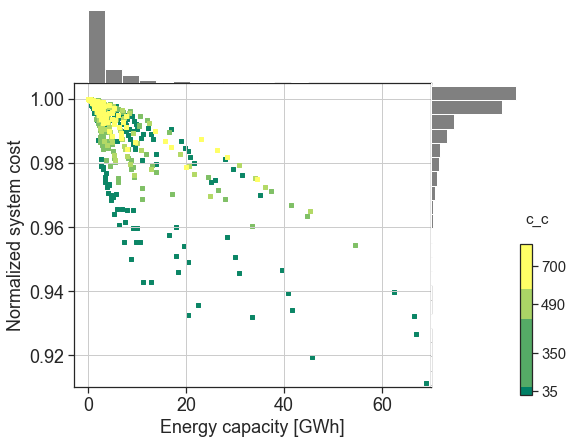

In [31]:
plot_scatter(sector='T-H-I-B',x='E',color_acc_to='c_c', binwidth_factor = 0.05)

curtailment
c_sys [bEUR]


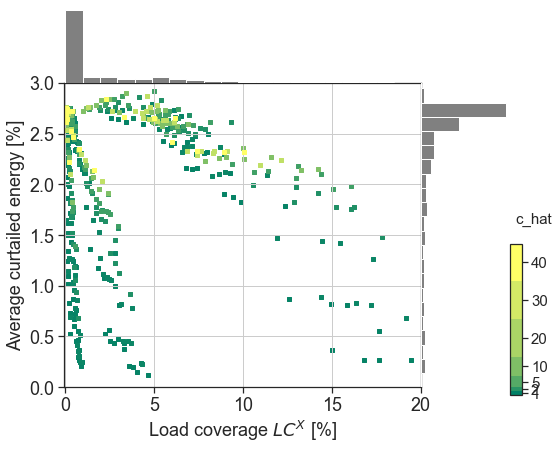

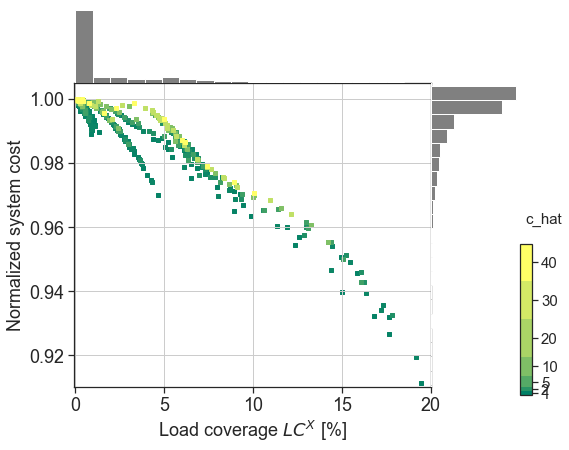

In [32]:
plot_scatter(sector='T-H-I-B',x='LC',color_acc_to='c_hat', binwidth_factor = 0.05)